In [1]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt


In [2]:
#!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

In [3]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

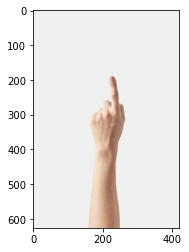

In [4]:
img = cv2.imread("image2.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

# Get the data/landmarks for one hand

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
hand1_x,5.062776e-01,0.584006,0.613663,0.606252,0.589848,0.570763,0.559756,0.549771,0.541283,0.504841,...,0.512355,0.525599,0.452164,0.461222,0.480281,0.487525,0.407043,0.425343,0.440746,0.445387
hand1_y,6.194640e-01,0.572468,0.513003,0.465510,0.437789,0.480236,0.396337,0.349771,0.313510,0.482391,...,0.441161,0.465934,0.493996,0.453505,0.470540,0.490704,0.507445,0.473141,0.488793,0.506725
hand1_z,-2.858335e-08,0.009327,0.009214,0.010876,0.012058,-0.039931,-0.053488,-0.058464,-0.062671,-0.045206,...,-0.027518,-0.020591,-0.046637,-0.039534,-0.015821,-0.006202,-0.047924,-0.043182,-0.026569,-0.017002


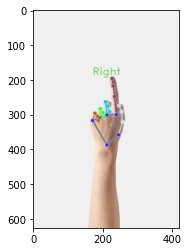

In [28]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import pandas as pd

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("images/image2.jpeg")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(annotated_image);

# STEP 6: Extract the landmarks from the detection result.
hand1 = pd.DataFrame(detection_result.hand_landmarks[0], columns=['x', 'y', 'z']).T
hand1 = hand1.rename(index={'x': 'hand1_x', 'y': 'hand1_y', 'z': 'hand1_z'})
hand1.head()

# Getting the data/landmarks several images

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
hand_x,5.062776e-01,0.584006,0.613663,0.606252,0.589848,0.570763,0.559756,0.549771,0.541283,0.504841,...,0.396893,0.307658,0.323780,0.358677,0.254489,0.170045,0.268356,0.256087,0.171491,0.104730
hand_y,6.194640e-01,0.572468,0.513003,0.465510,0.437789,0.480236,0.396337,0.349771,0.313510,0.482391,...,0.699061,0.683728,0.680821,0.787242,0.760166,0.688928,0.756134,0.812324,0.747831,0.655704
hand_z,-2.858335e-08,0.009327,0.009214,0.010876,0.012058,-0.039931,-0.053488,-0.058464,-0.062671,-0.045206,...,-0.223783,-0.231618,-0.090072,-0.191453,-0.216158,-0.207872,-0.092363,-0.183641,-0.208318,-0.207026


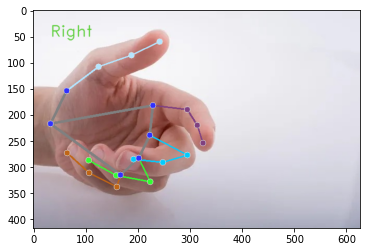

In [44]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import pandas as pd
import os
from os import listdir

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

cont=1
hand_dfs = []
# STEP 3: Loop to load the input images.
folder = "images" # path to folder containing images
for image in os.listdir(folder):
    image = mp.Image.create_from_file(f"{folder}/{image}")

    # STEP 4: Detect hand landmarks from the input image.
    detection_result = detector.detect(image)

    # STEP 5: Process the classification result. In this case, visualize it.
    annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
    plt.imshow(annotated_image);

    # STEP 6: Extract the landmarks from the detection result.
    hand_df = pd.DataFrame(detection_result.hand_landmarks[0], columns=['x', 'y', 'z']).T

    #.format in rename not working
    hand_df = hand_df.rename(index={'x': 'hand_x', 'y': 'hand_y', 'z': 'hand_z'})
    hand_dfs.append(hand_df)
    hands_df = pd.concat(hand_dfs, axis=1)
    cont+=1

hands_df.head(9)